# Task 4- Sales Prediction 

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score 

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [127]:
df.shape

(200, 4)

## Check for null values
### If there are any null values then we have to perform data cleaning 

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## We will use box plot to check for outliers 

<Axes: >

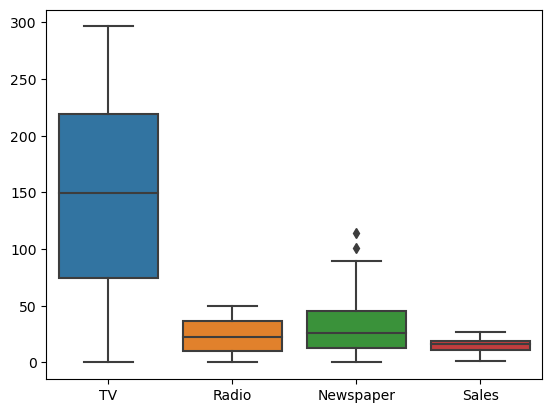

In [129]:
sns.boxplot(df)

## Data Visualisation

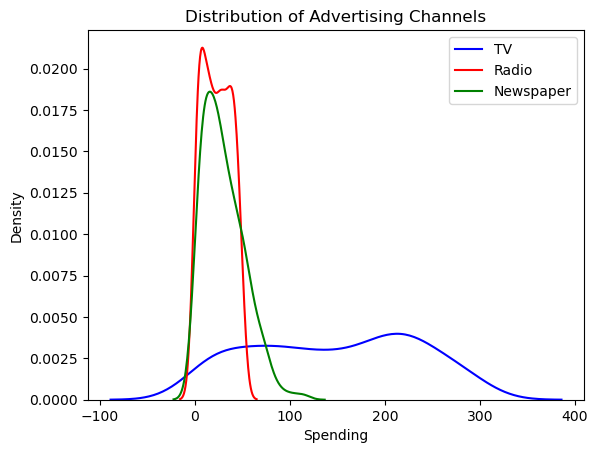

In [130]:
plt.subplot(1, 1, 1)
sns.kdeplot(df['TV'], label='TV', color='blue')
sns.kdeplot(df['Radio'], label='Radio', color='red')
sns.kdeplot(df['Newspaper'], label='Newspaper', color='green')
plt.title('Distribution of Advertising Channels')
plt.xlabel('Spending')
plt.ylabel('Density')
plt.legend()
plt.show()

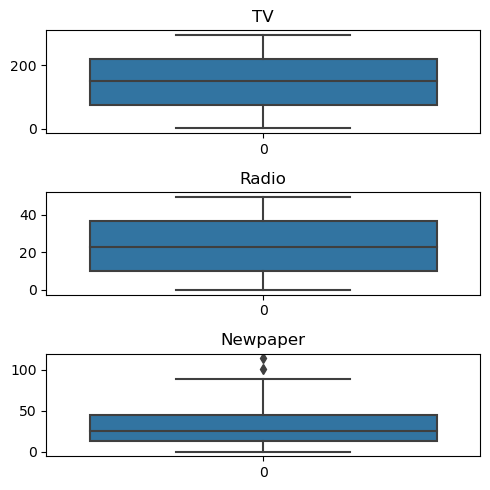

In [10]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1=sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df['Radio'], ax=axs[1])
plt3=sns.boxplot(df['Newspaper'], ax=axs[2])

plt1.set(title='TV')
plt2.set(title='Radio')
plt3.set(title='Newpaper')

plt.tight_layout()

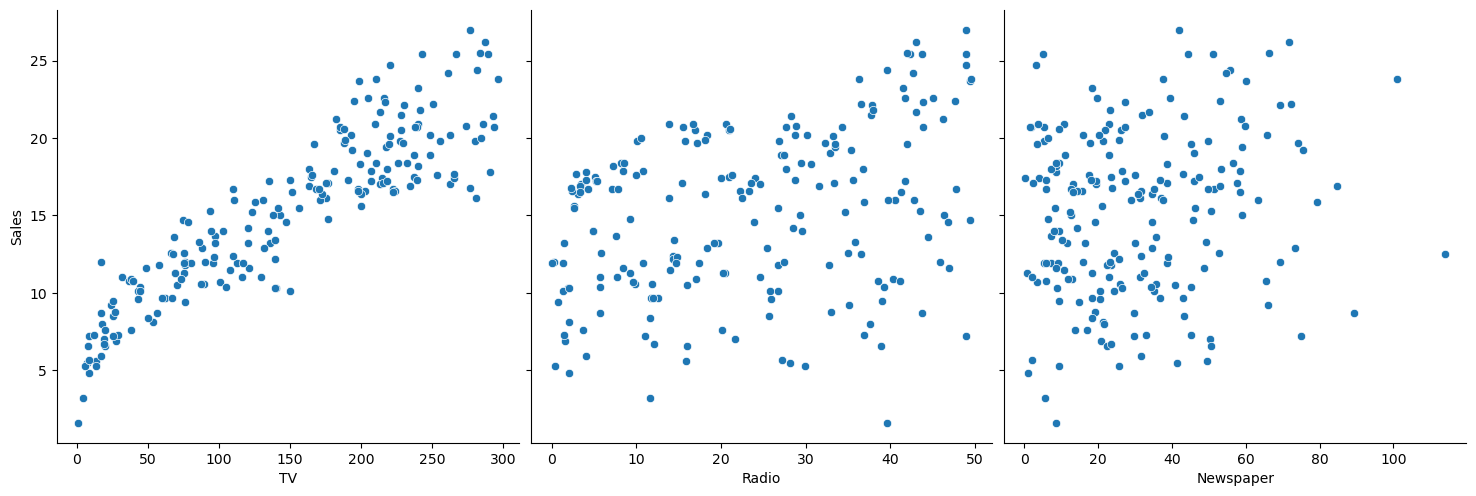

In [131]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'],height=5, kind='scatter')


# we can see in the above scatter plot that radio's and newspaper's data share a week relationship with sales 

<Axes: >

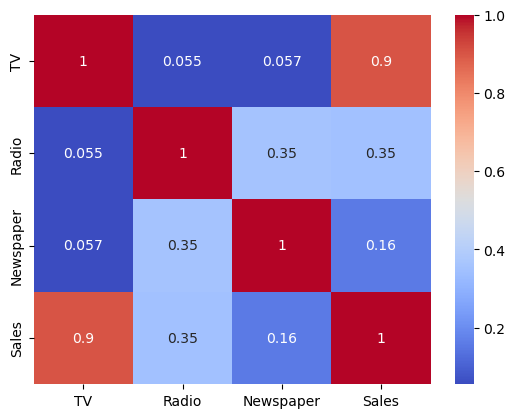

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: >

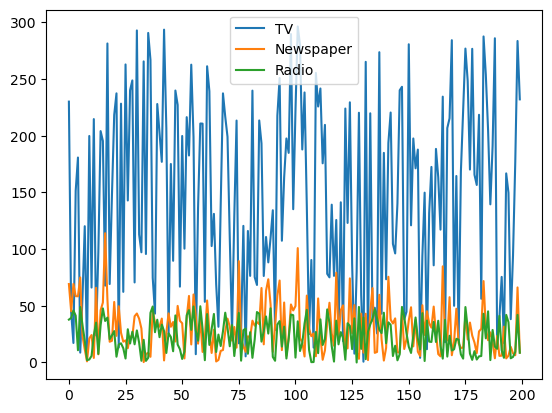

In [13]:
sns.lineplot(data=df[['TV', 'Newspaper', 'Radio']], dashes=False)

<Axes: xlabel='TV', ylabel='Count'>

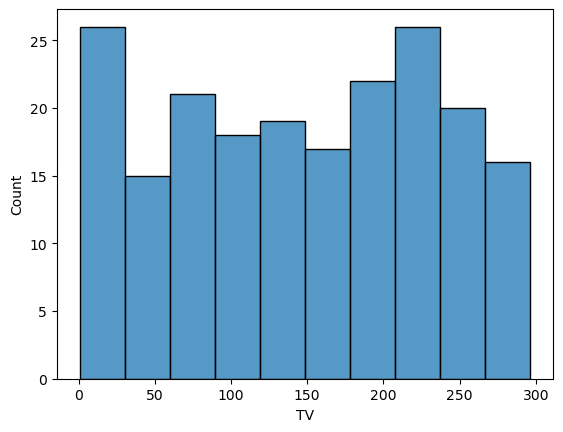

In [14]:
sns.histplot(df['TV'],bins=10)

<Axes: ylabel='Frequency'>

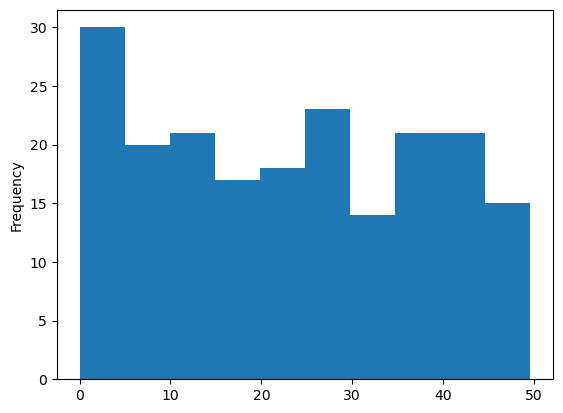

In [15]:
df['Radio'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

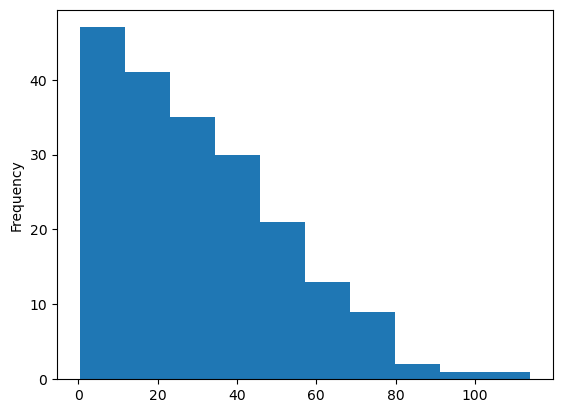

In [16]:
df['Newspaper'].plot.hist(bins=10)

/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


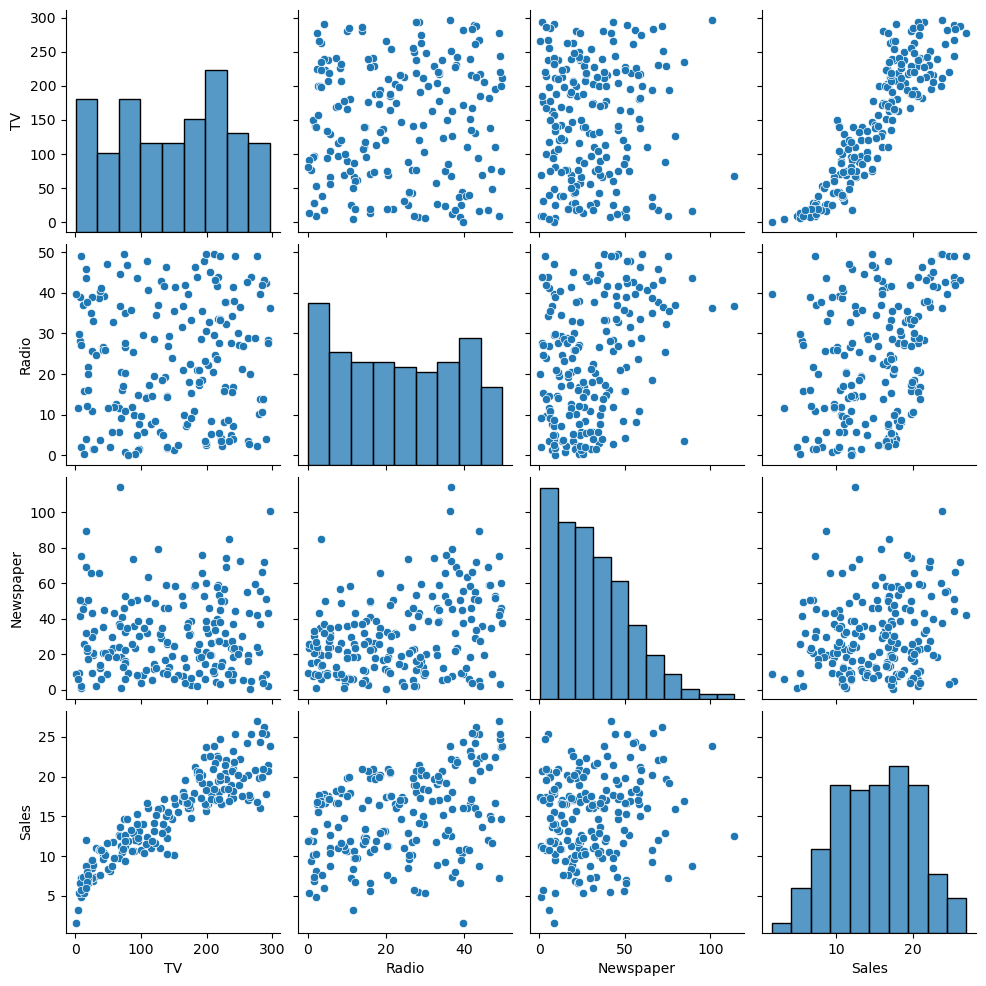

In [17]:
sns.pairplot(df)

## Model training

In [70]:
X=df.drop('Sales', axis=1)
y=df['Sales']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
print(X_train)

        TV  Radio  Newspaper
74   213.4   24.6       13.1
3    151.5   41.3       58.5
185  205.0   45.1       19.6
26   142.9   29.3       12.6
90   134.3    4.9        9.3
..     ...    ...        ...
87   110.7   40.6       63.2
103  187.9   17.2       17.9
67   139.3   14.5       10.2
24    62.3   12.6       18.3
8      8.6    2.1        1.0

[140 rows x 3 columns]


In [132]:
print(X_test)

        TV  Radio  Newspaper
126    7.8   38.9       50.6
104  238.2   34.3        5.3
99   135.2   41.7       45.9
92   217.7   33.5       59.0
111  241.7   38.0       23.2
167  206.8    5.2       19.4
116  139.2   14.3       25.6
96   197.6    3.5        5.9
52   216.4   41.7       39.6
69   216.8   43.9       27.2
164  117.2   14.7        5.4
124  229.5   32.3       74.2
182   56.2    5.7       29.7
154  187.8   21.1        9.5
125   87.2   11.8       25.9
196   94.2    4.9        8.1
194  149.7   35.6        6.0
177  170.2    7.8       35.2
163  163.5   36.8        7.4
31   112.9   17.4       38.6
11   214.7   24.0        4.0
73   129.4    5.7       31.3
15   195.4   47.7       52.9
41   177.0   33.4       38.7
97   184.9   21.0       22.0
128  220.3   49.0        3.2
133  219.8   33.5       45.1
82    75.3   20.3       32.5
139  184.9   43.9        1.7
123  123.1   34.6       12.4
83    68.4   44.5       35.6
65    69.0    9.3        0.9
151  121.0    8.4       48.7
162  188.4   1

In [74]:
print(y_train)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64


In [75]:
print(y_test)

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64


In [133]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
test_pred=model.predict(X_test)

In [78]:
test_pred

array([ 9.35221067, 20.96344625, 16.48851064, 20.10971005, 21.67148354,
       16.16054424, 13.5618056 , 15.39338129, 20.81980757, 21.00537077,
       12.29451311, 20.70848608,  8.17367308, 16.82471534, 10.48954832,
        9.99530649, 16.34698901, 14.5758119 , 17.23065133, 12.56890735,
       18.55715915, 12.12402775, 20.43312609, 17.78017811, 16.73623408,
       21.60387629, 20.13532087, 10.82559967, 19.12782848, 14.84537816,
       13.13597397,  9.07757918, 12.07834143, 16.62824427,  8.41792841,
       14.0456697 ,  9.92050209, 14.26101605, 16.76262961, 17.17185467,
       18.88797595, 15.50165469, 15.78688377, 16.86266686, 13.03405813,
       10.47673934, 10.6141644 , 20.85264977, 10.1517568 ,  6.88471443,
       17.88702583, 18.16013938, 12.55907083, 16.28189561, 18.98024679,
       11.33714913,  5.91026916, 10.06159509, 17.62383031, 13.19628335])

In [134]:
r2_score(y_test,test_pred)       # Accuracy of the model

0.8655979373420271

In [135]:
X_test.iloc[-1,:]                # selecting last one row and three columns

TV           85.7
Radio        35.8
Newspaper    49.3
Name: 161, dtype: float64

In [138]:
X_test.iloc[-2,:].values.reshape(1, -1)

TV           197.6
Radio         23.3
Newspaper     14.2
Name: 152, dtype: float64

In [139]:
model.predict(X_test.iloc[-1:])

array([13.19628335])

In [145]:
y_test.iloc[-1]

13.3

In [144]:
model.predict(X_test.iloc[-2,:].values.reshape(1, -1))

array([17.62383031])

In [146]:
y_test.iloc[-2]

16.6